In [1]:
!rm -rf rf.c rf.cpython*
!python3 setup.py clean --all

zsh:1: no matches found: rf.cpython*
Traceback (most recent call last):
  File "/Users/jiawenhe/Desktop/rf/setup.py", line 2, in <module>
    from Cython.Build import cythonize
ModuleNotFoundError: No module named 'Cython'


In [ ]:
!python3 setup.py build_ext --inplace

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import rf

500


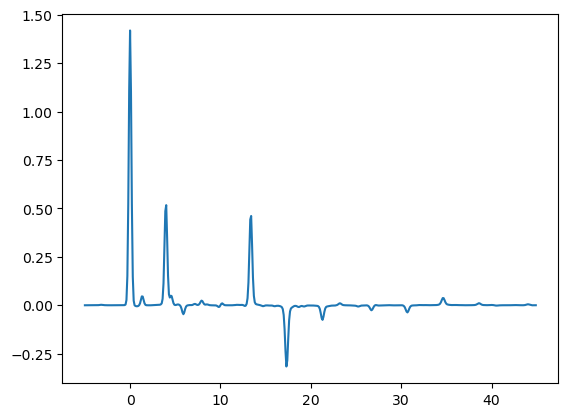

In [2]:
h    = [10,  20,  0.0]
vs   = [3.3, 3.4, 4.5]
kapa = [1.732, 1.732, 1.732]
###
t_shift             = 5
t_duration          = 50
t_sampling_interval = 0.1
gauss               = 5.0
###
data = rf.rf_calc(  ps=0, thik=h, beta=vs, kapa=kapa,
                    p=0.07,
                    duration=t_duration, dt=t_sampling_interval, shft=t_shift,
                    gauss=gauss)
###
ts = np.arange(data.size) * t_sampling_interval - t_shift
plt.plot(ts, data)
print(data.size)

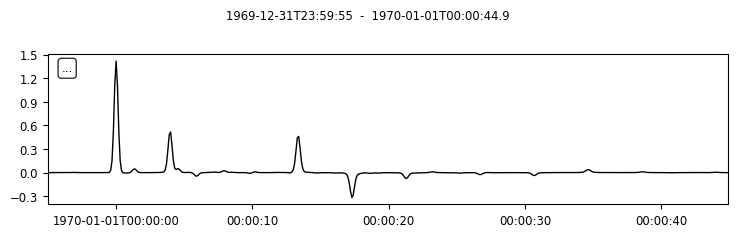

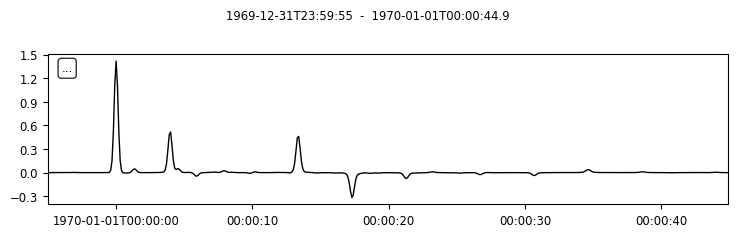

In [3]:
#make a obspy trace from the data
import obspy
tr = obspy.Trace(data)
tr.stats.delta = t_sampling_interval
tr.stats.starttime = -t_shift
tr.plot()